<a href="https://colab.research.google.com/github/cathrine36/ML_algorithms/blob/master/Project_2_House_Price_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KC House Price Prediction

In this exercise you'll try to build a regression model that predicts the price of a house.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

It's a great dataset for evaluating simple regression models.

https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/house/kc_house_data.csv") # read data into pandas dataframe

In [ ]:
df.head() # shows first 5 data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df[['lat', 'long']].describe()

,lat,long
count,21613.000000,21613.000000
mean,47.560053,-122.213896
std,0.138564,0.140828
min,47.155900,-122.519000
25%,47.471000,-122.328000
50%,47.571800,-122.230000
75%,47.678000,-122.125000
max,47.777600,-121.315000


In [ ]:
df = df.drop(['id', 'date', 'lat', 'long'], axis=1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [ ]:
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.054012,0.126434,-0.053203,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,0.154178,0.018841,-0.152668,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.506019,0.050739,-0.203866,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.318049,0.055363,-0.199430,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.053080,0.007644,-0.129574,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.279885,-0.011269
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.423898,0.023285,-0.261190,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.200355,0.017276
yr_built,0.054012,0.154178,0.506019,0.318049,0.053080,0.489319,0.423898,-0.133124,1.000000,-0.224874,-0.346869,0.326229,0.070958
yr_renovated,0.126434,0.018841,0.050739,0.055363,0.007644,0.006338,0.023285,0.071323,-0.224874,1.000000,0.064357,-0.002673,0.007854


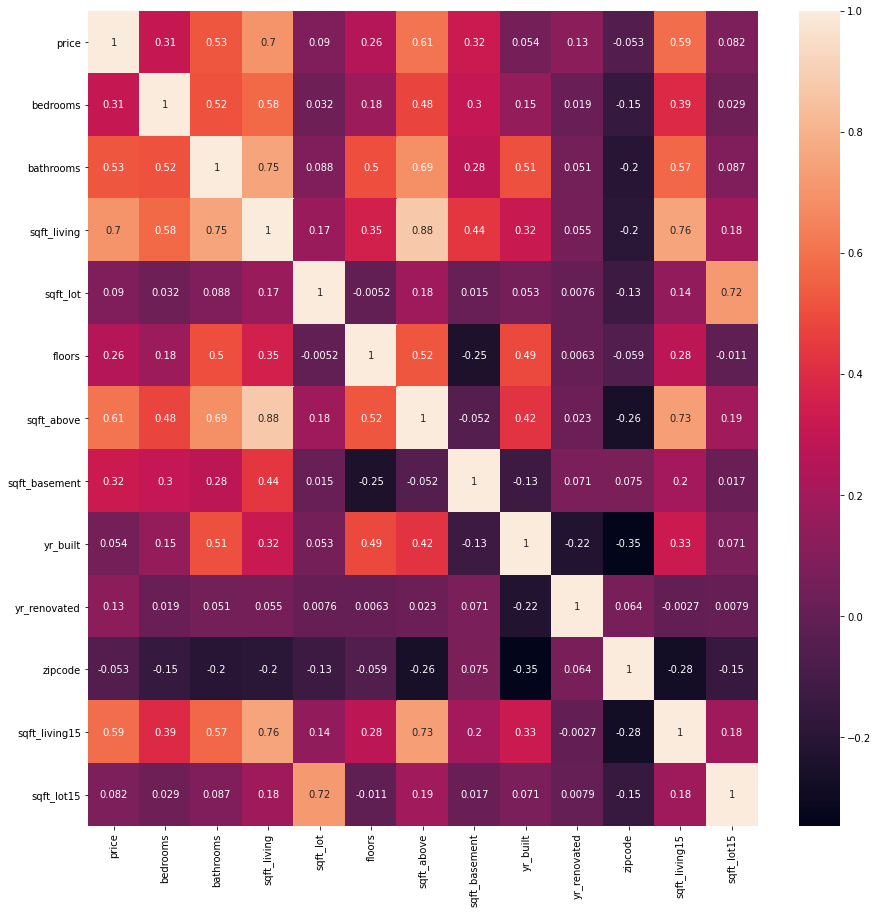

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

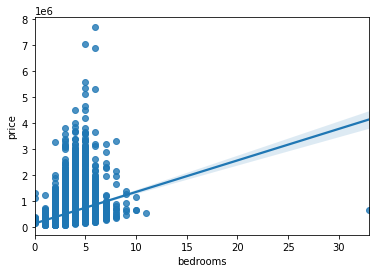

In [ ]:
sns.regplot(x="bedrooms", y="price", data=df)

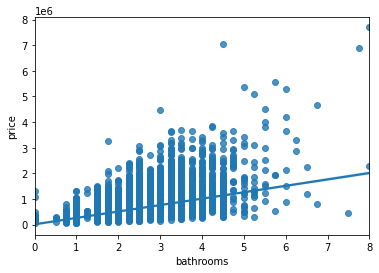

In [ ]:
sns.regplot(x="bathrooms", y="price", data=df)

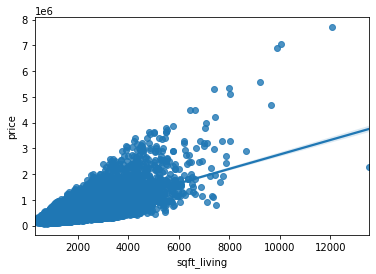

In [ ]:
sns.regplot(x="sqft_living", y="price", data=df)

A few points of observetion:
1. "Price" seems to have a significant correlation with "bathrooms", "sqft_living", "sqft_above", "sqft_living15", meanwhile also being affected by "bedrooms", "floors", "sqft_basement".
2. A lot of features exhibit correlations between one-another and hence cannot be considered "independent". (Shown in the next plot) 
> This might cause problems for Regression modelling later on. 

Regression Modelling

In [ ]:
results = {"Algorithm": [], "Best R-Squared": [], "Mean Squared Error": []}

## simple linear regression

In [ ]:
x=df[['sqft_living']]
y=df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(x,y)

0.49285321790379316

In [ ]:
yhat=lm.predict(x)
yhat[0:5]   

array([287555.06702451, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


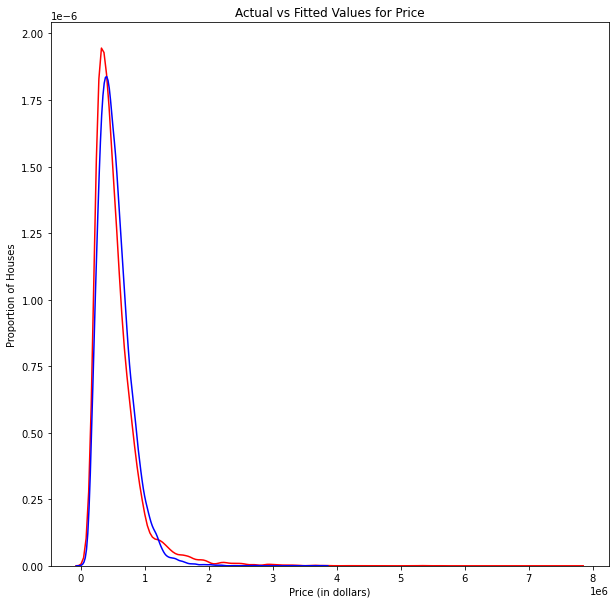

In [ ]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value") # hist=True
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()

In [ ]:
r2_score(y, yhat)

0.4928532179037931

In [ ]:
mean_squared_error(y, yhat)

68351286833.039825

In [ ]:
results['Algorithm'].append("Univariate Linear Regression")
results['Best R-Squared'].append(r2_score(y, yhat))
results['Mean Squared Error'].append(mean_squared_error(y, yhat))

## *Multivariate Regression*

In [ ]:
X=df[['sqft_living','grade','sqft_above','sqft_living15']]
Y=df['price']

In [ ]:
X

,sqft_living,grade,sqft_above,sqft_living15
0,1180,7,1180,1340
1,2570,7,2170,1690
2,770,6,770,2720
3,1960,7,1050,1360
4,1680,8,1680,1800
...,...,...,...,...
21608,1530,8,1530,1530
21609,2310,8,2310,1830
21610,1020,7,1020,1020
21611,1600,8,1600,1410


In [ ]:
lr = LinearRegression()
lr.fit(X,Y)
print(lr.score(X,Y))
y_lr=lr.predict(X)
y_lr[0:5]   


0.5419589651239656


array([298899.89457469, 543157.88332606, 169830.79596416, 487423.33983944,
       489363.06793136])

In [ ]:
print(r2_score(Y,y_lr))
print(mean_squared_error(Y,y_lr))

0.5419589651239656
61733003661.600845


In [ ]:
results['Algorithm'].append("Multivariate Linear Regression")
results['Best R-Squared'].append(r2_score(Y,y_lr))
results['Mean Squared Error'].append(mean_squared_error(Y,y_lr))

# Poynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polyfeat=PolynomialFeatures(degree=2)
x_poly=polyfeat.fit_transform(X)



In [ ]:
poly=LinearRegression()
poly.fit(X,Y)
polypred=poly.predict(X)
poly.score(X,Y)

0.5419589651239656

In [ ]:
results['Algorithm'].append("Polynomial Linear Regression")
results['Best R-Squared'].append(r2_score(Y,polypred))
results['Mean Squared Error'].append(mean_squared_error(Y,polypred))

# Decision Tree Regressor

In [ ]:
X=df.drop('price',axis='columns')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X,Y)
dtpred=dt.predict(X)
dt.score(X,Y)

0.9991302004579985

In [ ]:
results['Algorithm'].append("Decision Tree Regression")
results['Best R-Squared'].append(r2_score(Y,dtpred))
results['Mean Squared Error'].append(mean_squared_error(Y,dtpred))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=2)
kn.fit(X, Y)
kn.score(X,Y)

0.8173694146844374

In [ ]:
KNpred=kn.predict(X)

In [ ]:
results['Algorithm'].append("KNeighborsRegressor")
results['Best R-Squared'].append(r2_score(Y,KNpred))
results['Mean Squared Error'].append(mean_squared_error(Y,KNpred))

# RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X, Y)
rf.score(X,Y)


0.9744956636449328

In [ ]:
rfpred=rf.predict(X)

In [ ]:
results['Algorithm'].append("RandomForest Regression")
results['Best R-Squared'].append(r2_score(Y,rfpred))
results['Mean Squared Error'].append(mean_squared_error(Y,rfpred))

# Results

In [ ]:
results_log=pd.DataFrame(results)
results_log

,Algorithm,Best R-Squared,Mean Squared Error
0,Univariate Linear Regression,0.492853,6.835129e+10
1,Multivariate Linear Regression,0.541959,6.173300e+10
2,Polynomial Linear Regression,0.541959,6.173300e+10
3,Decision Tree Regression,0.999130,1.172282e+08
4,KNeighborsRegressor,0.817369,2.461425e+10
5,RandomForest Regression,0.974496,3.437376e+09


# Hyperparameter Tunnning

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
param_grid = {
    'max_depth':[1000,1100,1200,1300,1500]
}

In [ ]:
rf1 = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,  verbose = 2)

In [ ]:
grid_search.fit(X,Y)
grid_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] max_depth=1000 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... max_depth=1000, total=  11.6s
[CV] max_depth=1000 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV] ................................... max_depth=1000, total=  11.6s
[CV] max_depth=1000 ..................................................
[CV] ................................... max_depth=1000, total=  11.5s
[CV] max_depth=1100 ..................................................
[CV] ................................... max_depth=1100, total=  11.6s
[CV] max_depth=1100 ..................................................
[CV] ................................... max_depth=1100, total=  11.6s
[CV] max_depth=1100 ..................................................
[CV] ................................... max_depth=1100, total=  11.5s
[CV] max_depth=1200 ..................................................
[CV] ................................... max_depth=1200, total=  11.5s
[CV] max_depth=1200 ..................................................
[CV] ................................... max_depth=1200, total=  11.6s
[CV] max_depth=1200 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


{'max_depth': 1000}

In [ ]:
grid_search.best_params_

{'max_depth': 1000}

In [ ]:
grid_search.best_score_

0.8088981194181862

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(X) for X in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(X) for X in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X, Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 36.1min
